# EDA danych dotyczących Titanica

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

## Ogólny przegląd danych

In [1]:
# Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Pobranie danych pliku csv
df = pd.read_csv('26__titanic.csv', sep=",")

# Podstawowe informacje o danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [3]:
df.sample(10) # wyświeltnie 10 losowych wierszy

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
495,2.0,0.0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0.0,0.0,SC/A.3 2861,15.5792,NaN,C,NaN,NaN,"New York, NY"
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
978,3.0,1.0,"Lulic, Mr. Nikola",male,27.0,0.0,0.0,315098,8.6625,NaN,S,15,NaN,NaN
939,3.0,0.0,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0.0,2.0,350405,12.1833,NaN,S,NaN,NaN,NaN
285,1.0,0.0,"Straus, Mr. Isidor",male,67.0,1.0,0.0,PC 17483,221.7792,C55 C57,S,NaN,96.0,"New York, NY"
335,2.0,0.0,"Bateman, Rev. Robert James",male,51.0,0.0,0.0,S.O.P. 1166,12.5250,NaN,S,NaN,174.0,"Jacksonville, FL"
1054,3.0,0.0,"Naughton, Miss. Hannah",female,NaN,0.0,0.0,365237,7.7500,NaN,Q,NaN,NaN,NaN
738,3.0,1.0,"Cribb, Miss. Laura Alice",female,17.0,0.0,1.0,371362,16.1000,NaN,S,12,NaN,"Bournemouth, England Newark, NJ"
218,1.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.9000,C105,C,8,NaN,NaN
1260,3.0,1.0,"Turja, Miss. Anna Sofia",female,18.0,0.0,0.0,4138,9.8417,NaN,S,15,NaN,NaN


In [4]:
df.tail(5) # ostatnie wiersze

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum() # ile jest brakujących danych w kolumnach

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [6]:
df[df.duplicated()] # sprawdzenie duplikatów danych

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [7]:
df.describe() # statystyki

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
df.nunique() # ile jest wartości unikatowych w kolumnach

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

- Dane zawierają informacje o 1310 pasażerach.
- Brak duplikatów.
- W różnych kolumnach pojawiają się brakujące wartości

## Transformacje danych
- Ostatni wiersz składa się z samych brakujących wartości - trzeba go usunąć
- Należy sprawdzić Cenę Biletu (fare) i Port (embarked).
- W następnym kroku warto przyjrzeć się brakującym danym w kolumnie Wiek (age), bo jest ich dużo (264) i mogą mieć znaczący wpływ na analizę danych.

### Usunięcie pustego wiersza

In [9]:
# Usuwamy ostatni wiersz z brakującymi danymi
df = df.dropna(subset=['pclass']) 

# Sprawdzamy pozostałe brakujące wartości
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### Analiza brakujących danych portu zaokrętowania (embarked)

In [10]:
# Sprawdzenie jakie są wartości w kolumnie embarked
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [11]:
df[df['embarked'].isnull()] # pokaż wiersze z pustą wartością w kolumnie embarked

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


- Brak portu początkowego można uzupełnić. W tym celu przejrzymy rekordy o podobnym numerze biletu.

In [12]:
# Wyszukujemy rekordy o podobnym numerze biletu
ticket_number = "113572"

# Utwórz kopię oryginalnego DataFrame
df_copy = df.copy()

# Posortuj dane po numerze biletu
df_copy = df_copy.sort_values(by='ticket').reset_index(drop=True)

# Znajdź indeksy rekordów z wybranym numerem biletu
matching_indices = df_copy[df_copy['ticket'] == ticket_number].index

# Przechowuj wyniki dla wszystkich wystąpień
results = []

for index in matching_indices:
    # Pobierz 4 rekordy przed i 4 po dla każdego indeksu
    lower_neighbors = df_copy.iloc[max(0, index - 3):index]
    upper_neighbors = df_copy.iloc[index + 1:index + 4]
    current_record = df_copy.iloc[[index]]
    # Połącz wyniki dla tego wystąpienia
    result = pd.concat([lower_neighbors, current_record, upper_neighbors])
    results.append(result)

# Połącz wszystkie wyniki w jeden DataFrame
final_result = pd.concat(results).drop_duplicates()

final_result

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
55,1.0,0.0,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C,NaN,234.0,"Providence, RI"
56,1.0,0.0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0.0,0.0,113510,35.0000,C128,S,NaN,NaN,"London, England"
57,1.0,0.0,"Stead, Mr. William Thomas",male,62.0,0.0,0.0,113514,26.5500,C87,S,NaN,NaN,"Wimbledon Park, London / Hayling Island, Hants"
58,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0000,B28,NaN,6,NaN,NaN
59,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0000,B28,NaN,6,NaN,"Cincinatti, OH"
60,1.0,1.0,"Carter, Master. William Thornton II",male,11.0,1.0,2.0,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
61,1.0,1.0,"Carter, Miss. Lucile Polk",female,14.0,1.0,2.0,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
62,1.0,1.0,"Carter, Mr. William Ernest",male,36.0,1.0,2.0,113760,120.0000,B96 B98,S,C,NaN,"Bryn Mawr, PA"


- Z sześciu biletów o numerze niższym i wyższym od dwóch osób bez portu początkowego pięć osób zostało zaokrętowanych w Southampton (S). Czyli brakujące wartości w tej kolumnie uzupełnimy tym właśnie portem.

In [13]:
df['embarked'] = df['embarked'].fillna('S') # zastąpienie pustych wartością stałą S
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

### Analiza brakującej ceny biletu

In [14]:
df[df['fare'].isnull()] # pokaż wiersze z pustą wartością w kolumnie fare

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN


- Brakująca cena biletu występuje tylko w jednym przypadku pasażera z 3 klasy. Sprawdzę jak rozkładają się ceny biletów w tej klasie.

In [15]:
class_3_df = df[df['pclass'] == 3]
class_3_df['fare'].value_counts()

8.0500    60
7.7500    55
7.8958    49
7.7750    26
7.2292    24
          ..
7.8000     1
6.2375     1
3.1708     1
7.3125     1
7.8750     1
Name: fare, Length: 133, dtype: int64

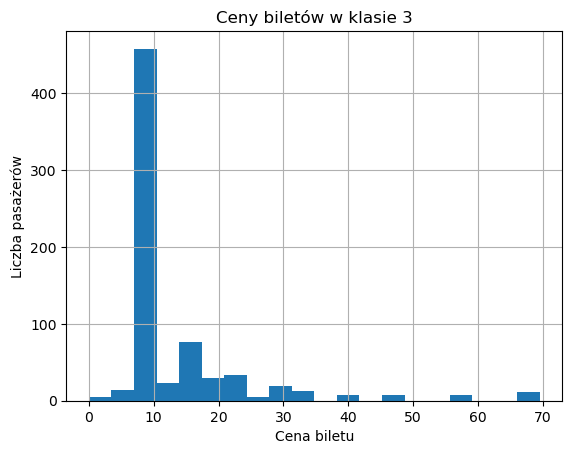

In [16]:
class_3_df['fare'].hist(bins=20)
plt.title('Ceny biletów w klasie 3')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

In [17]:
class_3_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,709.0,709.000000,501.000000,709.000000,709.000000,708.000000,55.000000
mean,3.0,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182
std,0.0,0.436331,11.958202,1.299681,0.981639,11.494358,102.403720
min,3.0,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,3.0,0.000000,18.000000,0.000000,0.000000,7.750000,67.500000
50%,3.0,0.000000,24.000000,0.000000,0.000000,8.050000,153.000000
75%,3.0,1.000000,32.000000,1.000000,0.000000,15.245800,257.000000
max,3.0,1.000000,74.000000,8.000000,9.000000,69.550000,328.000000


In [18]:
df['fare'] = df['fare'].fillna(8) # zastąpienie pustej ceny biletu - 8 - jako najczęśtsza wartość w klasie
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

- Pasażerowie 3 klasy w zdecydowanej większości zapłacili za bilet 8.
- Brakującą wartość uzupełniłem o tę cenę.

### Analiza brakujących rekordów bez podanego wieku

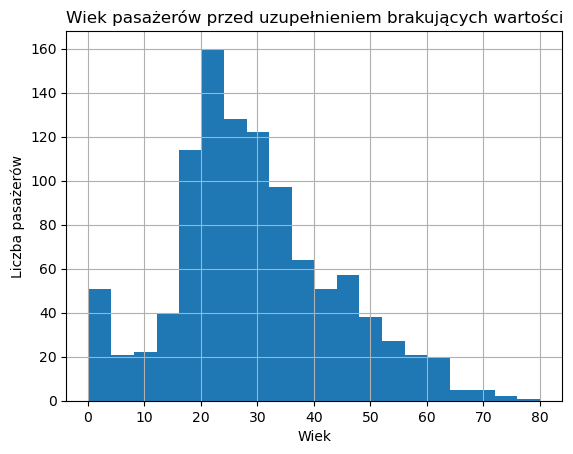

In [19]:
df['age'].hist(bins=20)
plt.title('Wiek pasażerów przed uzupełnieniem brakujących wartości')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

In [20]:
df['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [21]:
no_age_df = df[df['age'].isnull()]
no_age_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,263.000000,263.000000,0.0,263.000000,263.000000,263.000000,1.0
mean,2.642586,0.277567,NaN,0.482890,0.243346,19.823319,153.0
std,0.726812,0.448652,NaN,1.448443,0.949941,27.550667,NaN
min,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,153.0
25%,3.000000,0.000000,NaN,0.000000,0.000000,7.750000,153.0
50%,3.000000,0.000000,NaN,0.000000,0.000000,8.050000,153.0
75%,3.000000,1.000000,NaN,0.000000,0.000000,22.804150,153.0
max,3.000000,1.000000,NaN,8.000000,9.000000,227.525000,153.0


In [22]:
# pogrupowanie DF po kolumnie klasa i obliczenie kilku agregacji dla fare
no_age_df.groupby('pclass').agg({'fare': ['mean', 'median']}) 

fare         
             mean   median
pclass                    
1.0     53.135038  31.6833
2.0     10.154425  12.6125
3.0     14.321133   7.8958

- Jest dosyć dużo brakujących wartości w kolumnie Wiek (age) - 263. Zastąpienie ich jedną wartością średnią czy medianą, mocno by zniekształciło analizę. Widać tam na przykład ośmioro dzieci. Zdecydowałem się na uzupełnienie tych danych losowymi wartościami wieku. Należy pamiętać, że takie podejście może nam zabużyć wyniki wśród najmłodszych i najstarszych pasażerów.

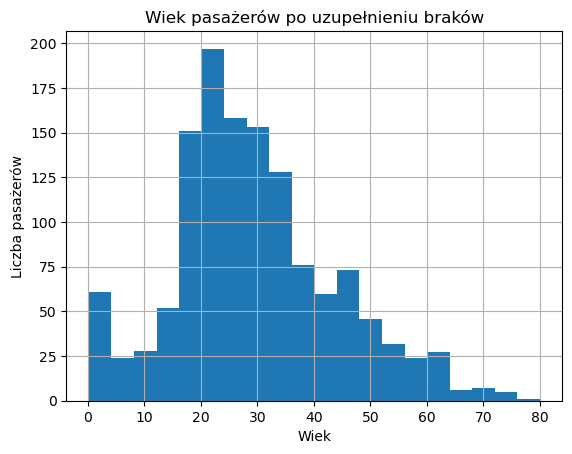

In [23]:
# Liczba brakujących wartości w kolumnie 'age'
missing_count = df['age'].isna().sum()

# Losowanie brakujących wartości z istniejących (z powtórzeniami)
random_samples = df['age'].dropna().sample(missing_count, replace=True)

# Przypisanie indeksów brakujących wartości do wylosowanych próbek
random_samples.index = df[df['age'].isna()].index

# Uzupełnienie brakujących wartości w kolumnie 'age'
df.loc[df['age'].isna(), 'age'] = random_samples

# Histogram rozkładu kolumny 'age' (20 przedziałów)
df['age'].hist(bins=20)
plt.title('Wiek pasażerów po uzupełnieniu braków')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

In [24]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

- Pozostałe wartości brakujące zostawiam. Nie da się ich zasymulować, a też mogą wnosić pewne informacje.

## Analiza pojedynczych zmiennych

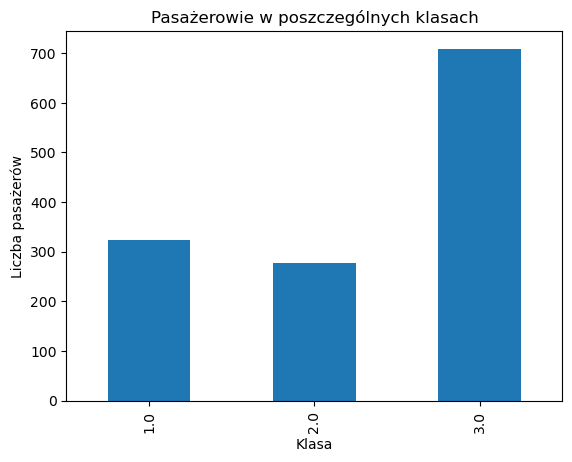

In [25]:
df['pclass'].value_counts().sort_index().plot(kind='bar')
plt.title('Pasażerowie w poszczególnych klasach')
plt.xlabel('Klasa')
plt.ylabel('Liczba pasażerów')
plt.show()

- Liczba pasażerów w klasie pierwszej jest nieco wyższa niż w klasie drugiej.
- W klasie 3 było najwięcej pasażerów - trochę więcej niż w pozostałych klasach łącznie.

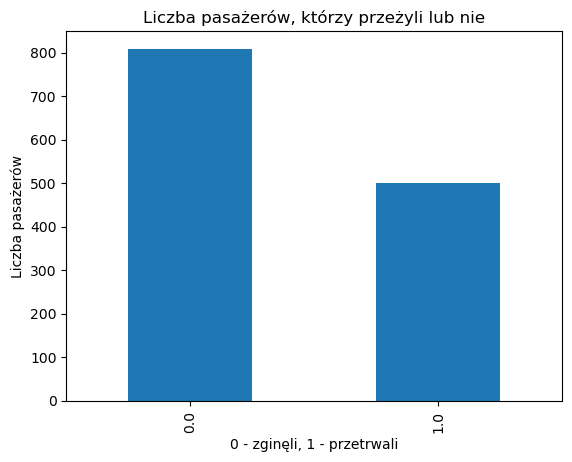

In [26]:
df['survived'].value_counts().plot(kind='bar')
plt.title('Liczba pasażerów, którzy przeżyli lub nie')
plt.xlabel('0 - zginęli, 1 - przetrwali')
plt.ylabel('Liczba pasażerów')
plt.show()

- Z ponad 1300 pasażerów katastrofę przeżyło tylko około 500.

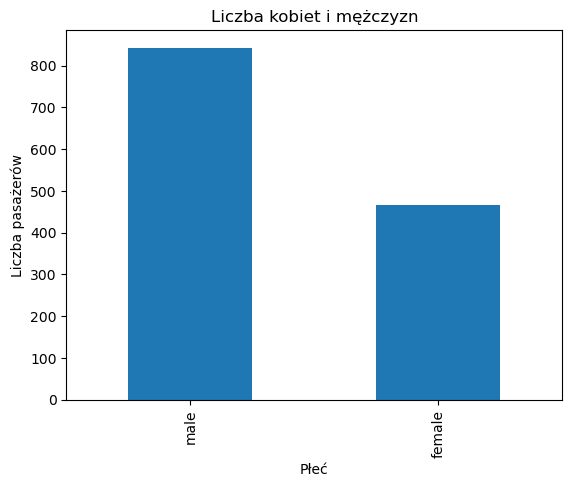

In [27]:
df['sex'].value_counts().plot(kind='bar')
plt.title('Liczba kobiet i mężczyzn')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')
plt.show()

- Na statku było dwukrotnie więcej mężczyzn niż kobiet.

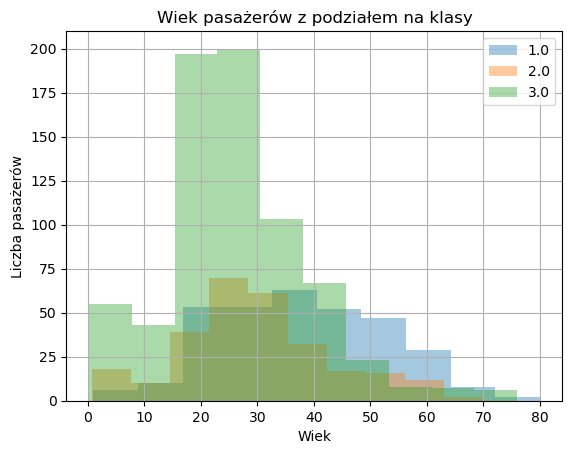

In [28]:
df.groupby('pclass')['age'].hist(alpha=0.4, legend=True)
plt.title('Wiek pasażerów z podziałem na klasy')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.show()

- Interesująco wygląda rozkład wieku pasażerów w poszczególnych klasach. W 3 klasie widzimy przewagę ludzi młodych. Spora ich część podróżowała z małymi dziećmi.
- W 3 klasie podróżowali raczej ludzie w średnim wieku 30-50 letni. Kilkoro najstarszych pasażerów również wykupiło bilet w 1 klasie.
- Klasa 2, jak można by przypuszczać, ładnie wpasowała się w średnią pomiędzy klasą 1 i 3. Widzimy tu podobny rozkład jak w klasie 3, ale jest on trochę przesunięty w kierunku starszych ludzi, podobnie jak w klasie 1.

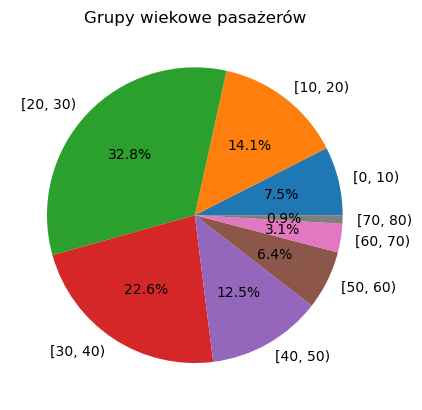

In [29]:
# Grupowanie wieku na przedziały co 10 lat
df['age_group'] = pd.cut(df['age'], bins=range(0, int(df['age'].max()) + 10, 10), right=False)

# Liczenie wystąpień w każdej grupie
df_summary = df['age_group'].value_counts().sort_index()

# Tworzenie wykresu kołowego
df_summary.plot(kind='pie', labels=df_summary.index.astype(str), legend=False, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Grupy wiekowe pasażerów')
plt.show()

- Największą grupą wiekową są dwodziestolatkowie - stanowili 1/3 liczbę pasażerów.
- Najmniej było seniorów i to już od 60 roku życia.

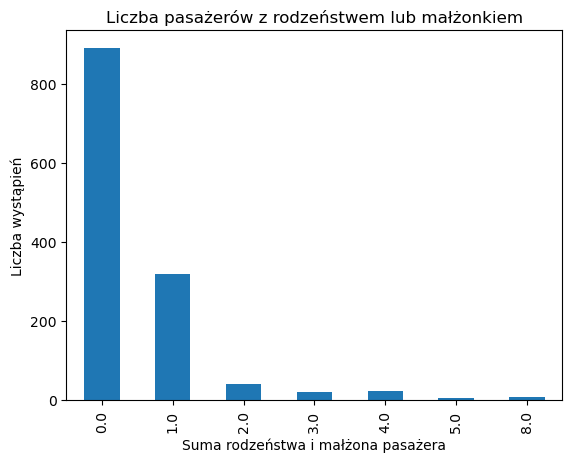

In [30]:
df['sibsp'].value_counts().sort_index().plot(kind='bar')
plt.title('Liczba pasażerów z rodzeństwem lub małżonkiem')
plt.xlabel('Suma rodzeństwa i małżona pasażera')
plt.ylabel('Liczba wystąpień')
plt.show()

In [31]:
print('Liczba pasażerów z rodzeństwem lub małżonkiem')
df['sibsp'].value_counts().sort_index()

Liczba pasażerów z rodzeństwem lub małżonkiem


0.0    891
1.0    319
2.0     42
3.0     20
4.0     22
5.0      6
8.0      9
Name: sibsp, dtype: int64

- Niemal 900 pasażerów podróżowało bez rodzeństwa lub małżonka (chociaż mogli mieć rodziców lub dzieci).
- Około 400 osób mogło pochwalić się rodzeństwem lub małżonkiem.
- Na statku były dwie liczne rodziny. Jedna z sześciorgiem i jedna z dziewięciorgiem dzieci.

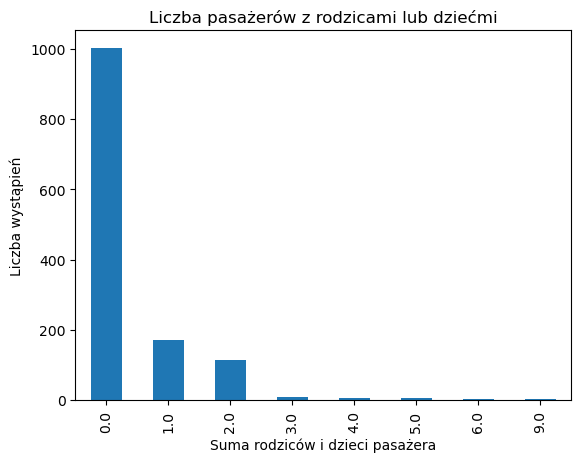

In [32]:
df['parch'].value_counts().sort_index().plot(kind='bar')
plt.title('Liczba pasażerów z rodzicami lub dziećmi')
plt.xlabel('Suma rodziców i dzieci pasażera')
plt.ylabel('Liczba wystąpień')
plt.show()

In [33]:
print('Liczba pasażerów z rodzicami lub dziećmi')
df['parch'].value_counts().sort_index()

Liczba pasażerów z rodzicami lub dziećmi


0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

- 1002 pasażerów podróżowało bez rodziców lub dzieci. Co w związku z poprzednim zestwieniem pozwala wywnioskować, że na statku było 100 osób, które miały rodzeństwo ale bez rodziców lub dzieci.
- Natomiast 300 osób miało co najmniej jednego z rodziców lub dziecko. 

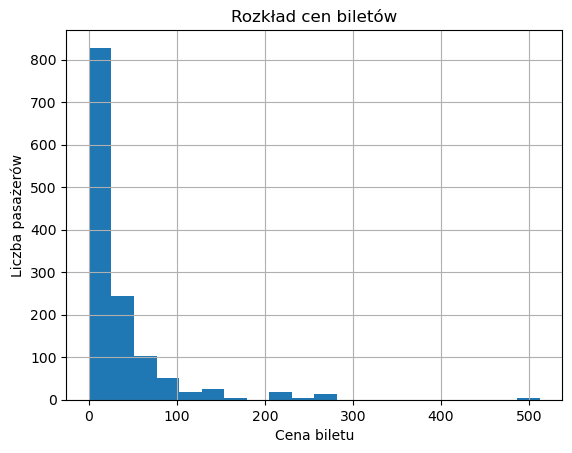

In [34]:
df['fare'].hist(bins=20)
plt.title('Rozkład cen biletów')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.show()

- Największa część biletów mieści się w wąskim przedziale najniższej ceny.
- Od około 20 liczba biletów w tych cenach bardzo szybko spada.
- Od pozostałych wyraźnie odróżniają się ceny powyżej 200, a szczególnie odstaje kilka biletów w cenie około 500.

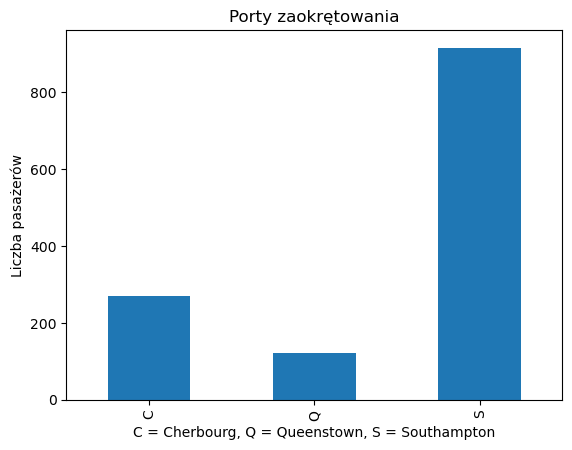

In [35]:
df['embarked'].value_counts().sort_index().plot(kind='bar')
plt.title('Porty zaokrętowania')
plt.xlabel('C = Cherbourg, Q = Queenstown, S = Southampton')
plt.ylabel('Liczba pasażerów')
plt.show()

- Większość pasażerów została zaokrętowana w Southampton.
- Najmniej w Queenstown - dwukrotnie mniej niż w środkowym w tym zestawieniu Cherbourg.

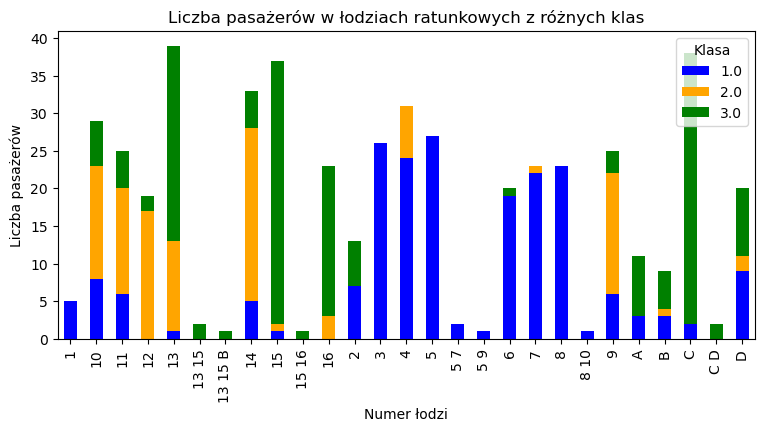

In [36]:
# Przygotowanie danych
grouped_data = df.groupby(['boat', 'pclass']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped_data.plot(kind='bar', stacked=True, figsize=(9, 4), color=['blue', 'orange', 'green'])
plt.title('Liczba pasażerów w łodziach ratunkowych z różnych klas')
plt.xlabel('Numer łodzi')
plt.ylabel('Liczba pasażerów')
plt.legend(title='Klasa')
plt.show()

- W łodziach ratunkowych znajdujemy przeważnie ludzi z 1 klasy.
- Podobnie widać, że 2 klasa znalazła w nich sporo miejsca.
- Tragicznie natomiast wygląda to ilu ludzi było w łodziach ratunkowych z 3 klasy, pamiętając, że tych pasażerów było najwięcej na statku.

## Analiza relacji między zmiennymi i wartości odstających

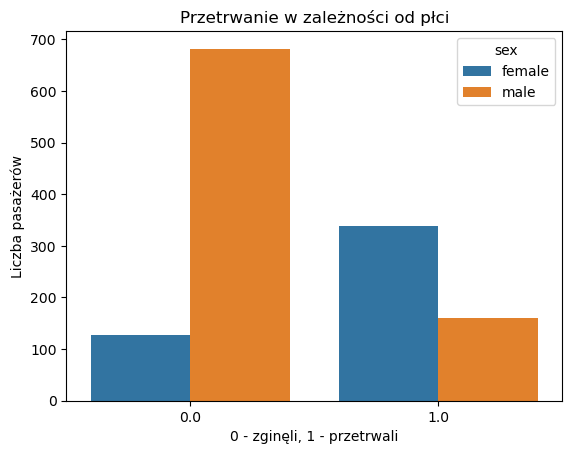

In [37]:
# df['sex'].value_counts().plot(kind='bar')
sns.countplot(x='survived', hue='sex', data=df)
plt.xlabel('0 - zginęli, 1 - przetrwali')
plt.ylabel('Liczba pasażerów')
plt.title('Przetrwanie w zależności od płci')
plt.show()

- Kobiety przeżyło dwukrotnie więcej niż mężczyzn.
- Pamiętając, że na statku było więcej mężczyzn, to z dużym zaokrągleniem można stwierdzić, że przeżył co czwarty mężczyzna, a tylko co czwarta kobieta zginęła w katastrofie.

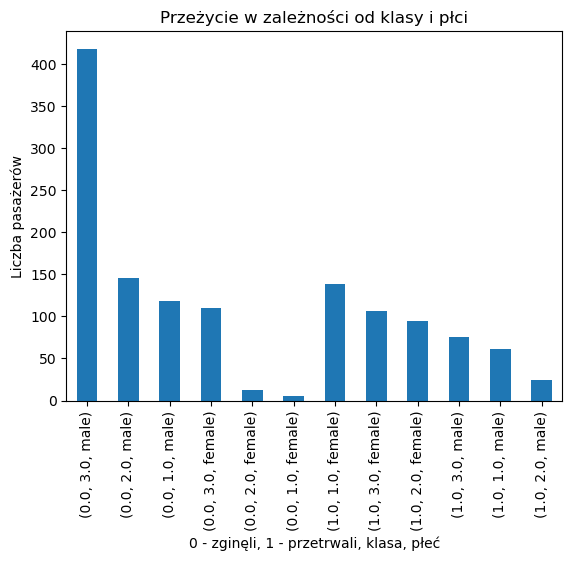

In [38]:
df.groupby('survived')[['pclass', 'sex']].value_counts().plot(kind='bar')
plt.xlabel('0 - zginęli, 1 - przetrwali, klasa, płeć')
plt.ylabel('Liczba pasażerów')
plt.title('Przeżycie w zależności od klasy i płci')
plt.show()

- Z tej zależności możemy wysnuć dosyć oczywiste wnioski o nas jako o ludziach.
- Pocieszające jest, że w ratowaniu pasażerów pierszeństwo miały kobiety.
- Ale nadal bogatsi, pasażerowie lepszych klas mieli większe szanse na przeżycie.

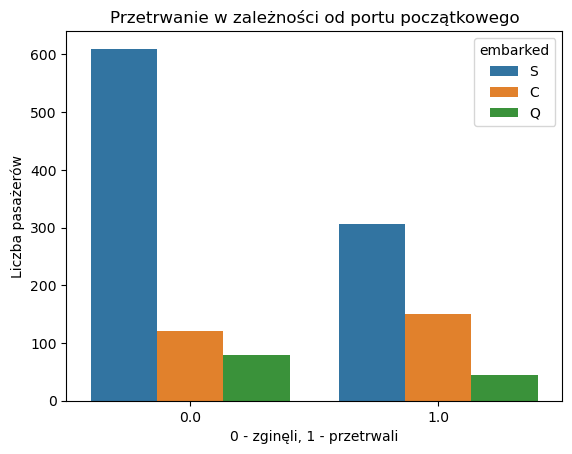

In [39]:
sns.countplot(x='survived', hue='embarked', data=df)
plt.xlabel('0 - zginęli, 1 - przetrwali')
plt.ylabel('Liczba pasażerów')
plt.title('Przetrwanie w zależności od portu początkowego')
plt.show()

- Ciekawie rozkłada się przeżycie w zależności od portu w którym zaczęli swoją podróż poszczególni pasażerowie.
- Większość z miasta Cherbourg przetrwała. Prawdopodobnie tamci ludzie byli w większości z klasy 1 lub 2.

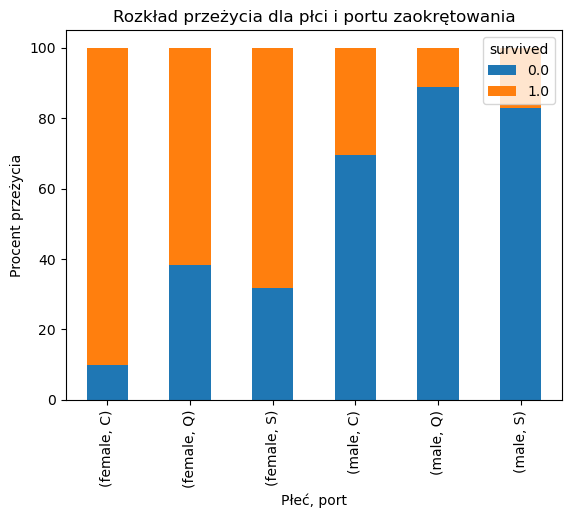

In [40]:
# Liczenie wystąpień dla 'embarked', 'pclass' i 'survived'
contingency_table = pd.crosstab([df['sex'], df['embarked']], df['survived'], normalize='index') * 100

# Tworzenie wykresu słupkowego dla procentów przeżycia 
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Płeć, port')
plt.ylabel('Procent przeżycia')
plt.title('Rozkład przeżycia dla płci i portu zaokrętowania')
plt.show()


- Jednak ostani wniosek jest najbardziej prawdziwy dla kobiet. Mężczyżni z portu Cherbourg nie byli pewni przetrwania.
- Największy odsetek śmierci był wśród mężczyzn zaczynających podróż w Queenstown.

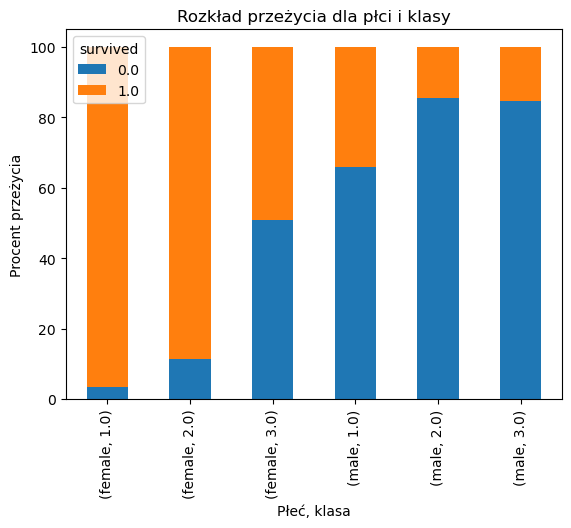

In [41]:
# Liczenie wystąpień dla 'klasa', 'pclass' i 'survived'
contingency_table = pd.crosstab([df['sex'], df['pclass']], df['survived'], normalize='index') * 100

# Tworzenie wykresu słupkowego dla procentów przeżycia 
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Płeć, klasa')
plt.ylabel('Procent przeżycia')
plt.title('Rozkład przeżycia dla płci i klasy')
plt.show()

- Niemal wszystkie kobiety z klasy pierwszej przetrwały katastrofę. 
- Nawet kobiety podróżujące trzecią klasą miały większe szanse na przeżycie niż mężczyźni z klasy pierwszej.
- Równe szanse, jednak najmniejsze w tym zestawieniu, mieli mężczyźni z klasy 2 i 3. Jest to zastanawiające, bo wśród kobiet 2 klasa jest bliżej 1, a nie 3.

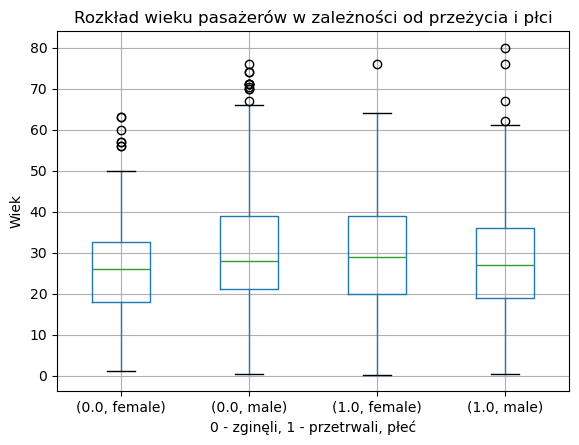

In [42]:
df.boxplot(column='age', by=['survived', 'sex'])
plt.suptitle('')  # Usuwa automatyczny tytuł generowany przez Pandas
plt.xlabel('0 - zginęli, 1 - przetrwali, płeć')
plt.ylabel('Wiek')
plt.title('Rozkład wieku pasażerów w zależności od przeżycia i płci')
plt.show()

- Wiek pasażerów znacząco nie wpływał na szanse przeżycia. Widać tylko małe różnice. Kobiety, które przeżyły były statystycznie nieznacznie starsze, od tych, które zginęły. Natomiast wśród mężczyzn zależność ta jest odwrotna i to mniej widoczna.
- Nawet najmłodszych dzieci było na tyle dużo, że nie zaliczamy ich jako przypadki odstające.
- Odwrotnie jest wśród osób najstarszych. Od około 60 roku życia według zasad statystyki ci ludzie są traktowani jako wartości odstające.

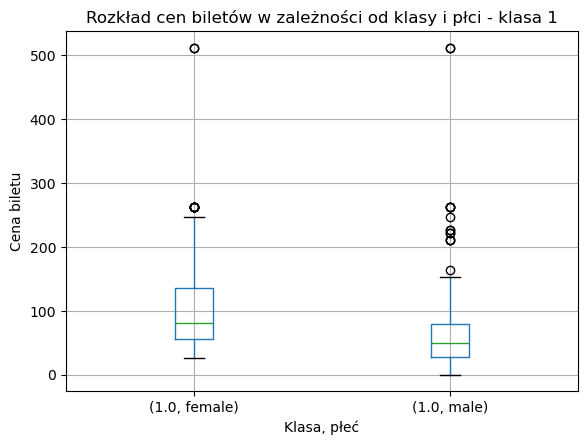

In [43]:
# Filtrowanie danych dla pclass = 1
df_filtered = df[df['pclass'] == 1]

df_filtered.boxplot(column='fare', by=['pclass', 'sex'])
plt.suptitle('')  # Usuwa automatyczny tytuł generowany przez Pandas
plt.xlabel('Klasa, płeć')
plt.ylabel('Cena biletu')
plt.title('Rozkład cen biletów w zależności od klasy i płci - klasa 1')
plt.show()

- Za większą szansę przeżycia kobiety musiały zapłacić większą cenę. W pierwszej widać wyraźnie, że kobiety płaciły więcej za bilet niż mężczyźni.
- Najdroższe bilety (ponad 500) sugerują jakieś ekskluzywne traktowanie tych pasażerów. Zapłacili niemal dwukrotnie więcej niż pozostałe najdroższe bilety w tej klasie.

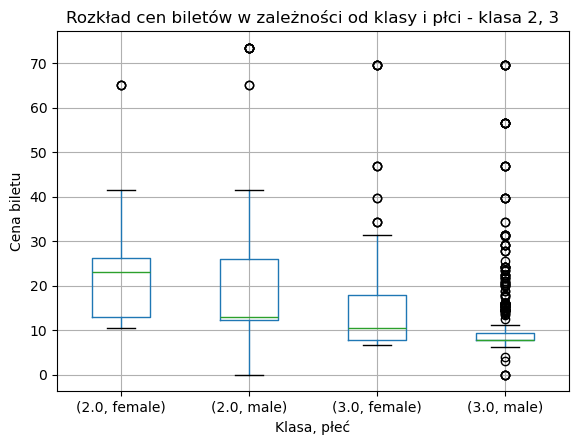

In [44]:
# Filtrowanie dla pclass = 2 lub 3 bez zmiany typu
df_filtered = df[(df['pclass'] > 1)]

# Tworzenie boxplotu
df_filtered.boxplot(column='fare', by=['pclass', 'sex'])
plt.suptitle('')  # Usuwa automatyczny tytuł generowany przez Pandas
plt.xlabel('Klasa, płeć')
plt.ylabel('Cena biletu')
plt.title('Rozkład cen biletów w zależności od klasy i płci - klasa 2, 3')
plt.show()

- W klasie 2 i 3 również widać wyraźną zależność ceny biletu od płci. W 3 klasie różnica ta jest już dosyć duża.
- Zaskakujące są dosyć liczne przypadki bardzo drogich biletów w klasie 3. Najdroższe z nich są droższe nawet niż część biletów w pierwszej klasie. Być może byli to zdesperowani ludzie, którzy starali się dostać na statek nawet gdy wszystkie bilety były już sprzedane.

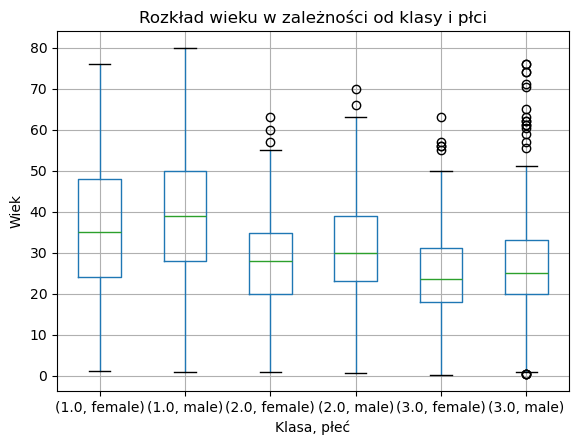

In [45]:
df.boxplot(column='age', by=['pclass', 'sex'])
plt.suptitle('')  # Usuwa automatyczny tytuł generowany przez Pandas
plt.xlabel('Klasa, płeć')
plt.ylabel('Wiek')
plt.title('Rozkład wieku w zależności od klasy i płci')
plt.show()

- W każdej klasie widzimy zależność, że kobiety są o kilka lat młodsze od mężczyzn.
- W klasie 3 przeważają 20 latkowie, w klasie pierwszej najliczniejsi są ludzie w wieku od 30 do 50 lat.
- Klasa 2 z rozkładem wieku mieści się pomiędzy klasą 1 i 2.
- Najstarsi pasażerowie to mężczyzna i co najmniej jedna kobieta z pierwszej klasy.
- W drugiej klasie było najmniej najmłodszych chłopców.

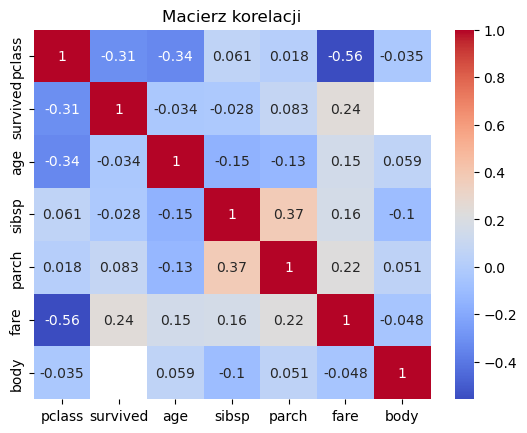

In [46]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

- Największą korelację wykazuje cena biletu z klasą. Co jest obserwacją oczywistą, chociaż można by się spodziewać, że będzie ona silniejsza niż -0,56.
- Podstawową badaną cechą jest przeżywalność. I tutaj nie widzimy mocnych korelacji. Występują tylko mniej widoczne:
  - przeżycie od klasy - im niższa klasa, tym większe szanse na przeżycie, ale wartość to tylko -0,31,
  - szansa przeżycia powoli też rosła wraz z ceną biletu,
  - pozostałe wartości praktycznie nie wykazują korelacji z przeżywalnością.
- Widoczna jest też korelacja między klasą a wiekiem pasażera. Im klasa liczbowo większa, tym pasażer był młodszy.

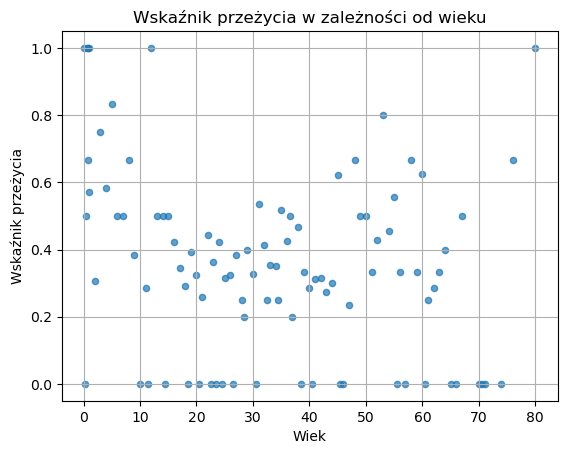

In [47]:
# Obliczenie średniego wskaźnika przeżycia dla każdego wieku
survival_rate_by_age = df.groupby('age')['survived'].mean()

survival_rate_by_age.reset_index().plot(kind='scatter', x='age', y='survived', alpha=0.7, grid=True)
plt.title('Wskaźnik przeżycia w zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Wskaźnik przeżycia')
plt.show()

- Wiek pasażera nie wpływał znacząco na szansę przeżycia. Widać delikatny trend, że im młodszy pasażej tym większe szanse przeżycia. Ale nie jest on jednoznaczny. Wynika on z tego, że kobiety, które przeżywały dużo częściej, były statystycznie młodsze od mężczyzn.
- Wbrew temu trendowi najstarsi pasażerowie przeżyli.

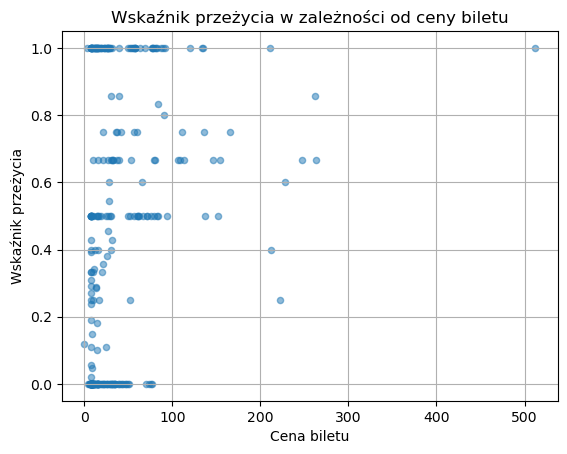

In [48]:
# Obliczenie średniego wskaźnika przeżycia dla cen biletów
survival_rate_by_age = df.groupby('fare')['survived'].mean()

survival_rate_by_age.reset_index().plot(kind='scatter', x='fare', y='survived', alpha=0.5, grid=True)
plt.title('Wskaźnik przeżycia w zależności od ceny biletu')
plt.xlabel('Cena biletu')
plt.ylabel('Wskaźnik przeżycia')
plt.show()

- Najdroższe bilety zagwarantowały przeżycie.
- Bilety droższe od około 70 dawały wysokie szanse przeżycia.
- W przypadku biletów tańszych o przeżyciu decydowały inne kryteria.

## Podsumowanie
- Pewność przeżycia podróży Tytanikiem dawało tylko wykupienie najdroższego biletu.
- Duże szanse miały kobiety, zwłaszcza z wyższych klas.
- Następnie już tylko nieduże szanse mieli mężczyźni z pierwszej klasy.
- Natomiast najgorzej mieli mężczyźni z drugiej i trzeciej klasy - przeżyło ich tylko po kilkanaście procent.
- Nie znając dokładnie historii tej tragedii, na podstawie danych można wysnuć wniosek, że o przeżyciu decydowało miejsce w łodzi ratunkowej, których było zdecydowanie za mało dla wszystkich pasażerów. Jacyś oficerowie lub inni członkowie załogi decydowali kogo do nich wpuszczą. Przyjęli zasadę, że pierwszeństwo mają kobiety z klasy 1 i 2, potem mężczyźni z klasy pierwszej, pozostałe kobiety z klasy 3, a na końcu mężczyźni z klas 2 i 3.